<a href="https://colab.research.google.com/github/DariusTheGeek/Unsupervised-learning-in-R__Kmeans-Hierarchical-clustering-PCA-and-t-SNE/blob/master/Unsupervised__learning__in__R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

---



Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

---

**The dataset for this Independent project can be found [here](http://bit.ly/EcommerceCustomersDataset)**

---
*The dataset consists of 10 numerical and 8 categorical attributes.*
 - The 'Revenue' attribute can be used as the class label.
 - "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related  - Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
 - The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
 - The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
 - The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
 - The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
 - The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
 - The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

---



In [0]:
# Installing and loading the necessary libraries
library(tidyverse)
library(magrittr)
library(grid)
library(devtools)
install_github("vqv/ggbiplot", force = TRUE)
library(ggbiplot)
install_github("espanta/lubripack", force = TRUE)
library(lubripack)
lubripack(c('gridExtra', 'ggcorrplot', 'ggExtra', 'caret', 'DataExplorer', 'Hmisc', 'pastecs', 'psych', 'corrplot', 'factoextra', 'Rtsne'))
library(Rtsne)
theme_set(theme_bw())
options(warn = -1)

In [0]:
# Loading the dataset
df = read_csv('http://bit.ly/EcommerceCustomersDataset')

# Previewing the head of the dataset
head(df)

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [0]:
# Checking the tail of the dataset
tail(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [0]:
# Checking the type of the dataset
class(df)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [0]:
# Changing the type of the loaded dataset to a dataframe
df = as.data.frame(df)

# Cleaning column names, by making them uniform
colnames(df) = tolower(colnames(df))

In [0]:
# Taking a glimpse at the dataframe
glimpse(df)

Observations: 12,330
Variables: 18
$ administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ administrative_duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ informational_duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ productrelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ productrelated_duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ bouncerates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ exitrates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ pagevalues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ specialday              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ operatingsystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ browser        

In [0]:
# Previewing some statistical summaries of the dataset
summary(df)

 administrative   administrative_duration informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 informational_duration productrelated   productrelated_duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  bounce

In [0]:
# Checking the shape of the dataframe
dim(df)

[1] 12330    18

In [0]:
# Checking for duplicated data
anyDuplicated(df)

[1] 159

In [0]:
# Dropping duplicates
df = distinct(df)

# Ckecking whether the duplicates have been successfully dropped
anyDuplicated(df)

[1] 0

In [0]:
# Checking for missing values
colSums(is.na(df))

administrative administrative_duration           informational 
                     12                      12                      12 
 informational_duration          productrelated productrelated_duration 
                     12                      12                      12 
            bouncerates               exitrates              pagevalues 
                     12                      12                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

In [0]:
# Dropping missing values
df = na.omit(df)

In [0]:
# Checking the datatypes for each column
columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    cat('\n')
}

[1] "administrative"
[1] "numeric"

[1] "administrative_duration"
[1] "numeric"

[1] "informational"
[1] "numeric"

[1] "informational_duration"
[1] "numeric"

[1] "productrelated"
[1] "numeric"

[1] "productrelated_duration"
[1] "numeric"

[1] "bouncerates"
[1] "numeric"

[1] "exitrates"
[1] "numeric"

[1] "pagevalues"
[1] "numeric"

[1] "specialday"
[1] "numeric"

[1] "month"
[1] "character"

[1] "operatingsystems"
[1] "numeric"

[1] "browser"
[1] "numeric"

[1] "region"
[1] "numeric"

[1] "traffictype"
[1] "numeric"

[1] "visitortype"
[1] "character"

[1] "weekend"
[1] "logical"

[1] "revenue"
[1] "logical"



In [0]:
# The Month, OperatingSystems,	Browser,	Region,	TrafficType and VisitorType	columns should be changed to factors
# Creating a list of columns to be changed to factors

cat_cols = c('month', 'operatingsystems',	'browser',	'region',	'traffictype', 'visitortype')

# Changing columns to factors
df[,cat_cols] %<>% lapply(function(x) as.factor(as.character(x)))
                          
# Checking whether the datatypes for each column have been changed apprippriately
columns = colnames(select(df, cat_cols))
for (column in seq(length(colnames(select(df, cat_cols))))){
    print(columns[column])
    print(class(select(df, cat_cols)[, column]))
    print(nlevels(select(df, cat_cols)[, column]))
    cat('\n')
}        

[1] "month"
[1] "factor"
[1] 10

[1] "operatingsystems"
[1] "factor"
[1] 8

[1] "browser"
[1] "factor"
[1] 13

[1] "region"
[1] "factor"
[1] 9

[1] "traffictype"
[1] "factor"
[1] 20

[1] "visitortype"
[1] "factor"
[1] 3



In [0]:
# Previewing the head of the cleaned dataframe
head(df)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [0]:
# Checking the structure of the cleaned dataframe
str(df)

'data.frame':	12199 obs. of  18 variables:
 $ administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ productrelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ productrelated_duration: num  0 64 -1 2.67 627.5 ...
 $ bouncerates            : num  0.2 0 0.2 0.05 0.02 ...
 $ exitrates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ pagevalues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ specialday             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ operatingsystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ browser                : Factor w/ 13 levels "1","10","11",..: 1 6 1 6 7 6 8 6 6 8 ...
 $ region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ tra

### Histograms

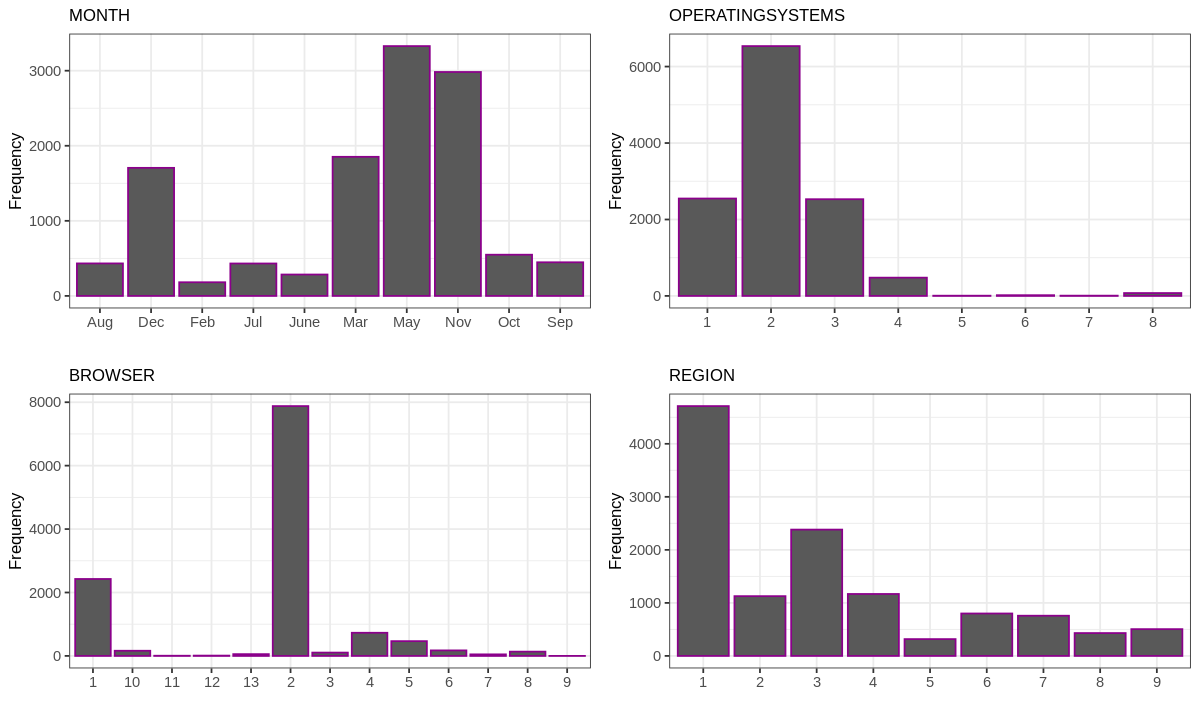

In [0]:
# Plotting histograms
fac_cols = c('month', 'operatingsystems',	'browser',	'region')

columns = colnames(select(df, fac_cols))

p = list()
options(repr.plot.width = 10, repr.plot.height = 6)
for (i in 1:4){
  p[[i]] = ggplot(df, aes_string(columns[i])) + geom_bar(color = 'darkmagenta') + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

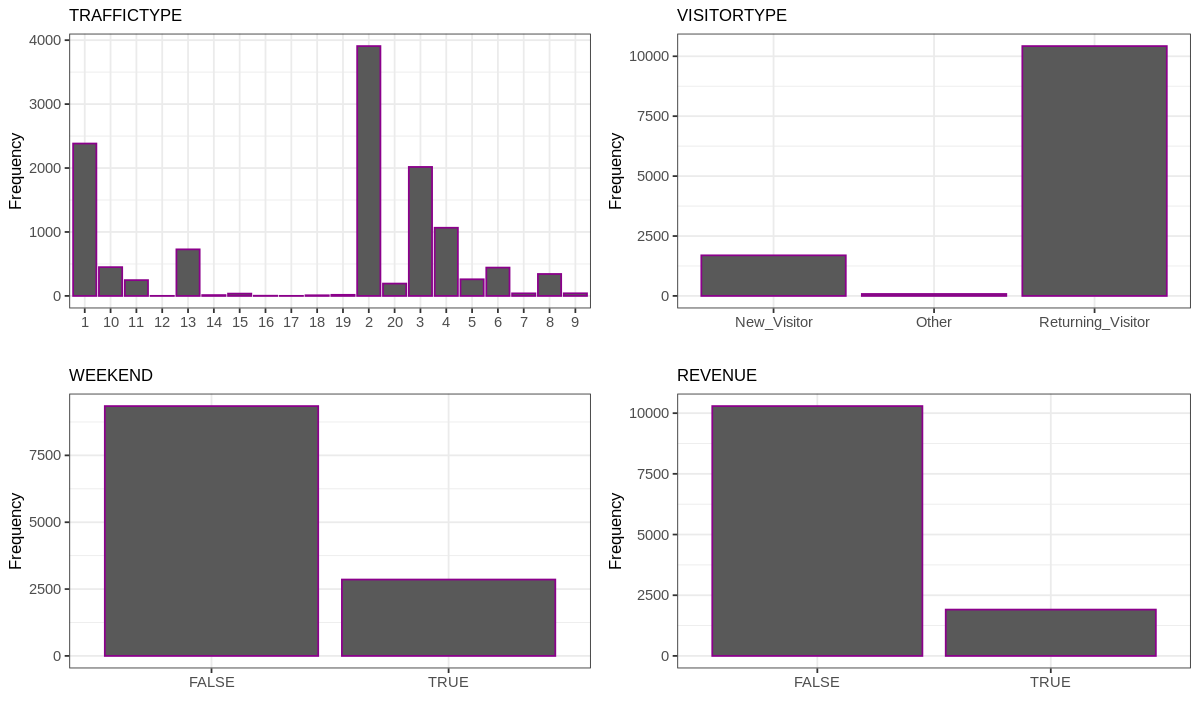

In [0]:
# Plotting histograms
fac_cols_2 = c('traffictype',	'visitortype',	'weekend',	'revenue')

columns_2 = colnames(select(df, fac_cols_2))

p_2 = list()
options(repr.plot.width = 10, repr.plot.height = 6)
for (i in 1:4){
  p_2[[i]] = ggplot(df, aes_string(columns_2[i])) + geom_bar(color = 'darkmagenta') + labs(y = 'Frequency', x = '', title = toupper(columns_2[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p_2)

### Boxplots

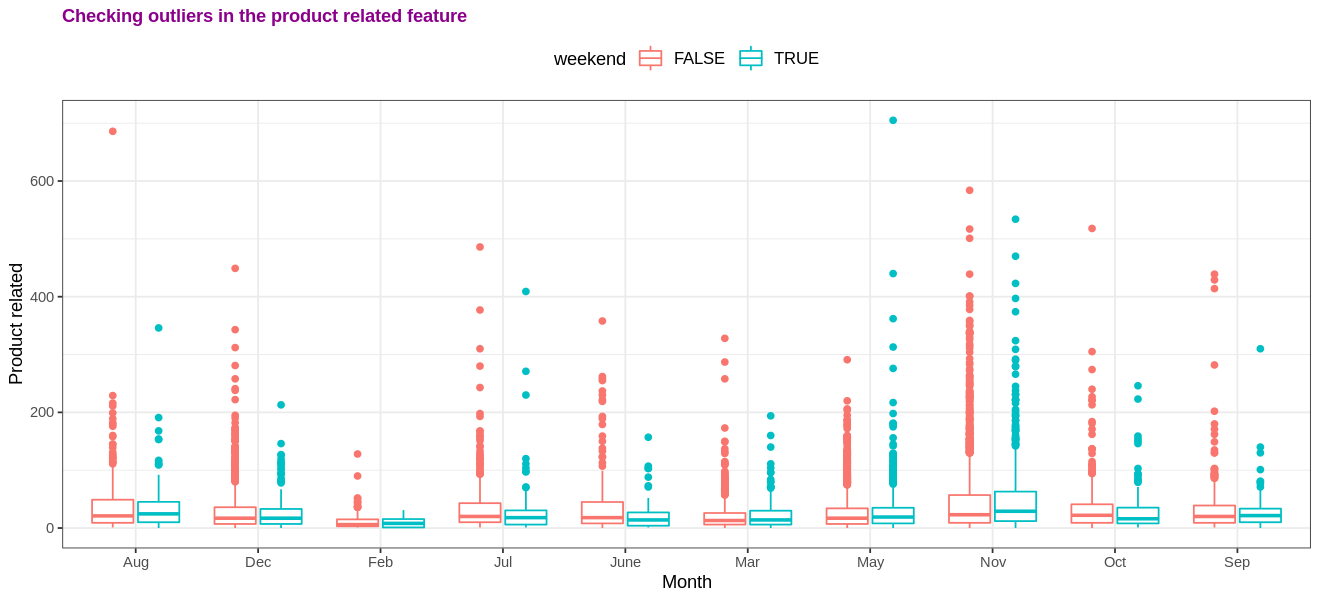

In [0]:
# Plotting boxplots
options(repr.plot.width = 11, repr.plot.height = 5)
ggplot(df, aes(month, productrelated, col = weekend)) + 
  geom_boxplot() + 
  labs(x = 'Month', y = 'Product related', title = 'Checking outliers in the product related feature') + 
  theme(legend.position = 'top', legend.text = element_text(size = 10),
       plot.title = element_text(size = 11, color = 'darkmagenta', face = 'bold'))

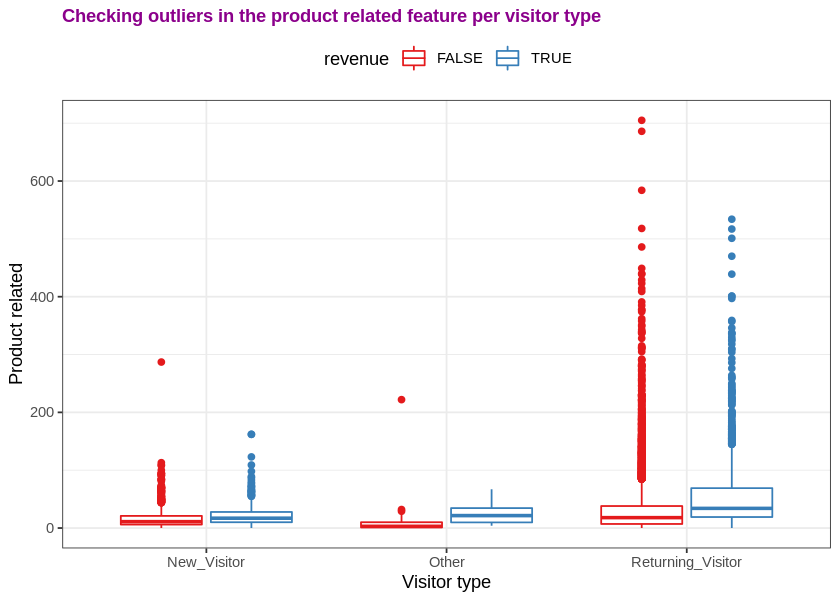

In [0]:
# Plotting boxplots to check for outliers
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df, aes(visitortype, productrelated, col = revenue)) + 
  geom_boxplot() + 
  labs(x = 'Visitor type', y = 'Product related', title = 'Checking outliers in the product related feature per visitor type') +
  scale_color_brewer(palette = 'Set1') +
  theme(legend.position = 'top',
       plot.title = element_text(size = 11, color = 'darkmagenta', face ='bold'))

### Density plots

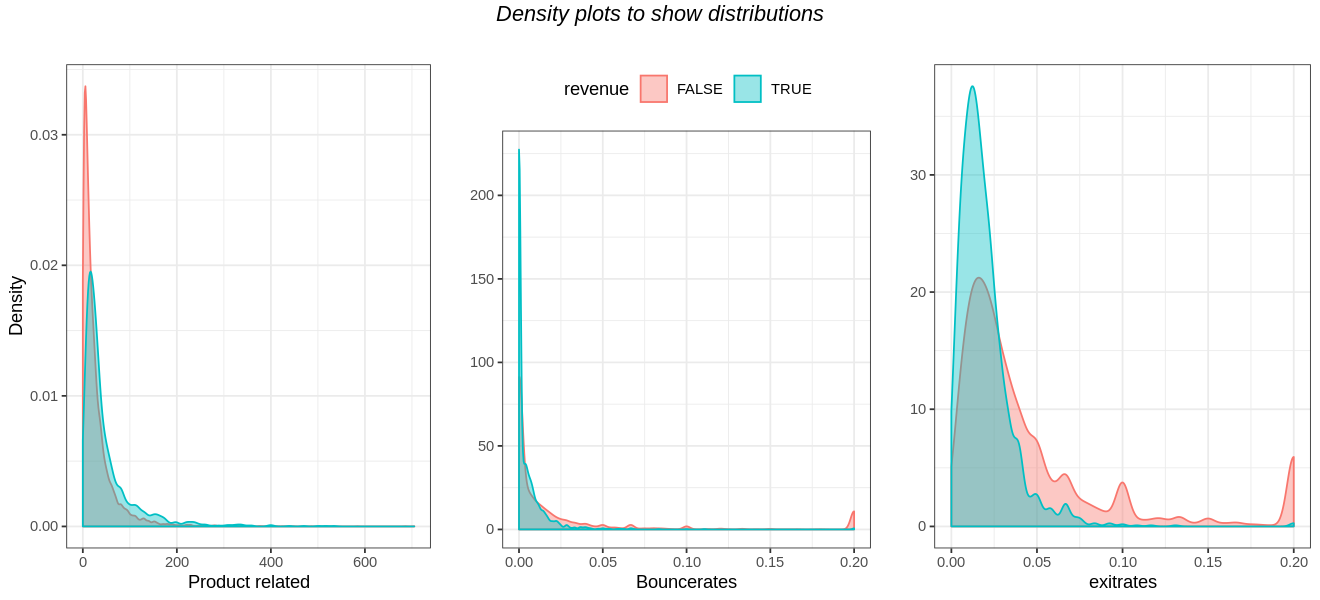

In [0]:
# Plotting density plots to check for distributions
options(repr.plot.width = 11, repr.plot.height = 5)
p1 = ggplot(df, aes(productrelated, col = revenue)) + 
  geom_density(aes(fill = revenue), alpha = 0.4) + 
  labs(x = 'Product related', y = 'Density', title = '') + 
  theme(legend.position = 'none', 
       plot.title = element_text(size = 12)) 

p2 = ggplot(df, aes(bouncerates, col = revenue)) + 
  geom_density(aes(fill = revenue), alpha = 0.4) + 
  labs(x = 'Bouncerates', y = '', title = '') + 
  theme(legend.position = 'top') 

p3 = ggplot(df, aes(exitrates, col = revenue)) + 
  geom_density(aes(fill = revenue), alpha = 0.4) + 
  labs(x = 'exitrates', y = '', title = '') + 
  theme(legend.position = 'none', 
       plot.title = element_text(size = 12)) 

grid.arrange(p1, p2, p3, ncol = 3, top = textGrob("Density plots to show distributions",gp=gpar(fontsize=13,font=3, color = 'darkmagenta')))

### Scatter plots

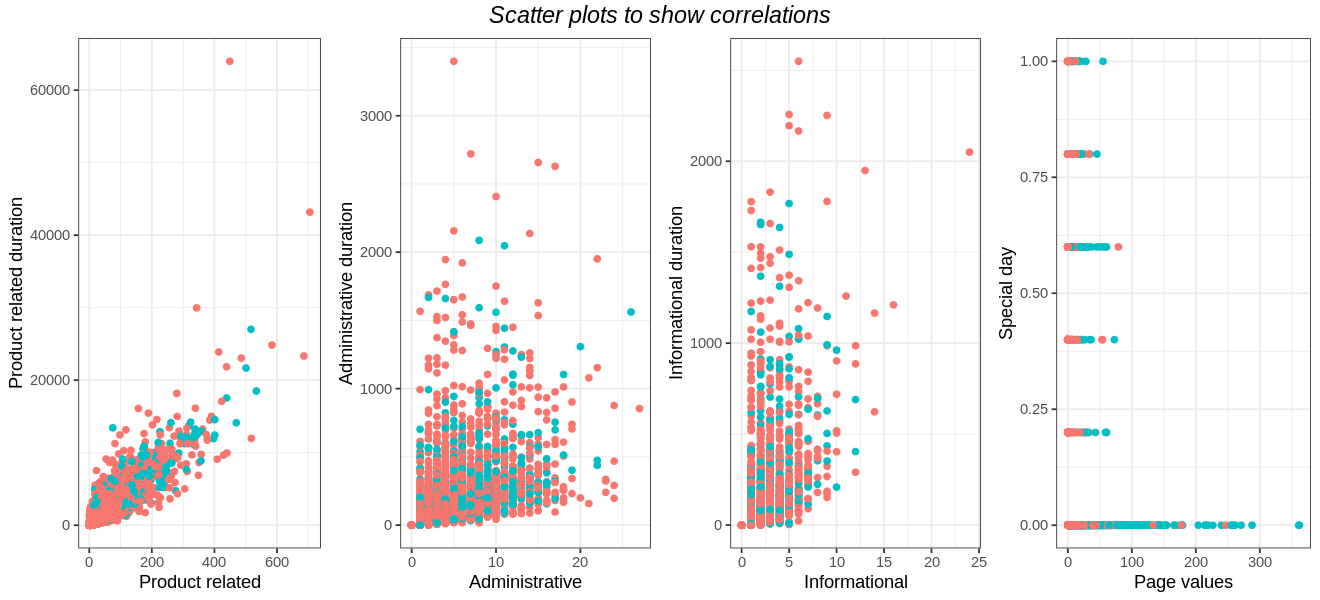

In [0]:
# Plotting scatter plots to check for correlations
options(repr.plot.width = 11, repr.plot.height = 5)

p1 = ggplot(df, aes(productrelated, productrelated_duration, col = revenue)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x='Product related', y ='Product related duration')

p2 = ggplot(df, aes(administrative, administrative_duration, col = revenue)) +
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Administrative', y = 'Administrative duration')

p3 = ggplot(df, aes(informational, informational_duration, col = revenue)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x = 'Informational', y = 'Informational duration')

p4 = ggplot(df, aes(pagevalues,	specialday	, col = revenue)) + 
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Page values', y = 'Special day')

grid.arrange(p1, p2, p3, p4, ncol = 4, 
             top = textGrob("Scatter plots to show correlations",gp=gpar(fontsize=14,font=3, color = 'darkmagenta')))

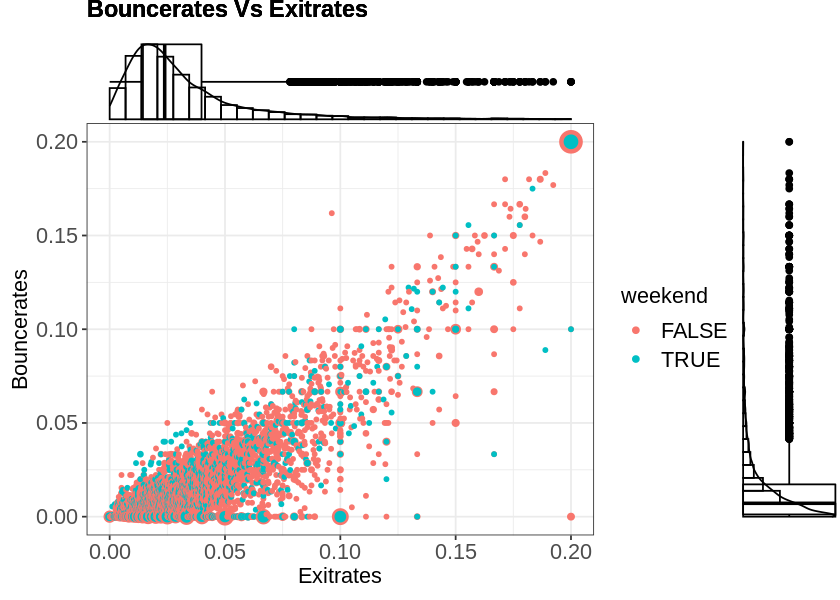

In [0]:
# Plotting histograms together with histograms
options(repr.plot.width = 7, repr.plot.height = 5)

g = ggplot(data =df, aes(x =exitrates, y = bouncerates, col = weekend)) + 
    geom_count(show.legend=c(size=FALSE)) + 
    labs(title = 'Bouncerates Vs Exitrates', y = 'Bouncerates', x = 'Exitrates') +
    theme(plot.title = element_text(size = 14, face = 'bold'),
             axis.title.x = element_text(size = 13),
             axis.title.y = element_text(size = 13),
             axis.text.x = element_text(size = 13),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13),
             legend.text = element_text(size = 13))

ggMarginal(g, type = "histogram", fill="transparent")
ggMarginal(g, type = "boxplot", fill="transparent")
ggMarginal(g, type = "density", fill="transparent")

### Correlogram

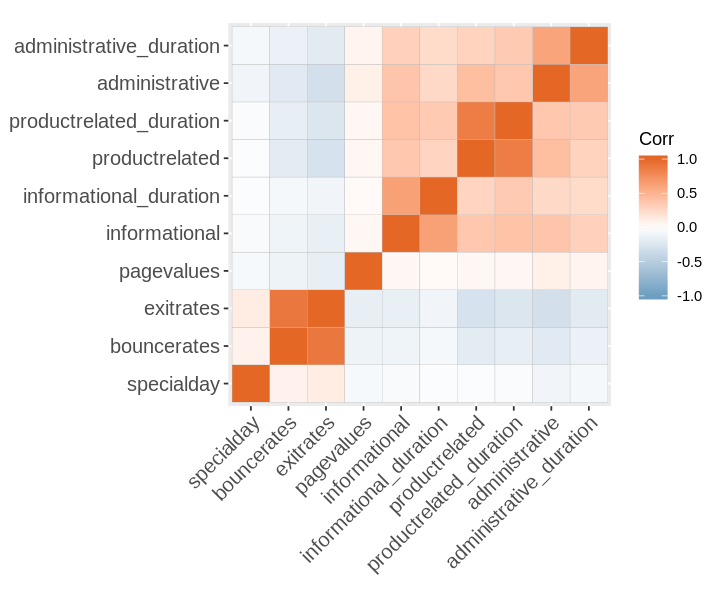

In [0]:
# Plotting a correlogram to check for correlations
options(repr.plot.width = 6, repr.plot.height = 5)

corr = round(cor(select_if(df, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), lab = F)

### Encoding categorical variables

In [0]:
# Creating a copy of the cleaned dataframe
non_dummy_df = data.table::copy(df)

# Encoding categorical variables
month = data.frame(model.matrix(~0+df$month))
opr = data.frame(model.matrix(~0+df$operatingsystems))
brw = data.frame(model.matrix(~0+df$browser))
reg = data.frame(model.matrix(~0+df$region))
trf = data.frame(model.matrix(~0+df$traffictype))
vis = data.frame(model.matrix(~0+df$visitortype))
wkn = data.frame(model.matrix(~0+df$weekend))
rev = data.frame(model.matrix(~0+df$revenue))

# Dropping columns which have already encoded
drop_cols = c('month', 'operatingsystems',	'browser',	'region',	'traffictype', 'visitortype', 'weekend', 'revenue')
df = select(data.frame(cbind(df, month, opr, brw, reg, trf, vis, wkn, rev)), -drop_cols)

### Kmeans

In [0]:
# Creating a copy of the dataframe for later usage
main_df = data.table::copy(df)

# Normalising the data
df = as.data.frame(apply(df, 2,  function(x) (x - min(x))/max(x) - min(x)))

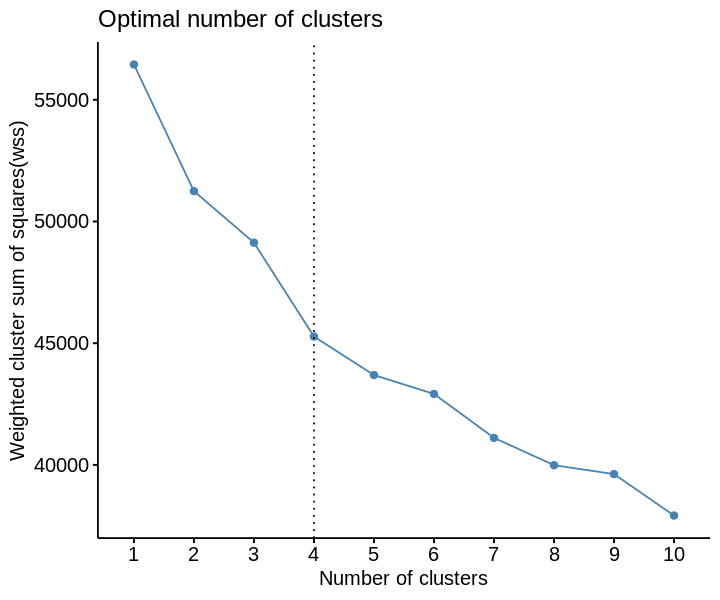

In [0]:
# Finding the optimal number of clusters using the elbow method
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_nbclust(df, kmeans, method = 'wss') + 
  geom_vline(xintercept = 4, linetype = 3) + 
  labs(x = 'Number of clusters', y = 'Weighted cluster sum of squares(wss)')


In [0]:
# Performing clustering with the optimal number of clusters
kmeans_res = kmeans(df, 4)

# Checking the cluster centers of each variable
kmeans_res$centers

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,⋯,df.traffictype7,df.traffictype8,df.traffictype9,df.visitortypeNew_Visitor,df.visitortypeOther,df.visitortypeReturning_Visitor,df.weekendFALSE,df.weekendTRUE,df.revenueFALSE,df.revenueTRUE
0.07885088,1.019908,0.01781524,1.012742,0.04657146,1.019627,0.09102102,0.21289293,0.005980868,0.07465940,⋯,0.002724796,0.01930064,0.0000000000,0.1146685,0.002497729,0.8828338,1.0000000,0.0000000,1,0
0.12568911,1.035449,0.03275681,1.022991,0.06838322,1.029344,0.02558576,0.09777584,0.075365536,0.02316562,⋯,0.006289308,0.04979036,0.0020964361,0.2211740,0.008385744,0.7704403,0.7384696,0.2615304,0,1
0.07621446,1.023821,0.01791785,1.010278,0.03302353,1.013229,0.15828098,0.26218414,0.005210076,0.06634561,⋯,0.002266289,0.02577904,0.0008498584,0.1110482,0.013597734,0.8753541,1.0000000,0.0000000,1,0
0.08534075,1.024338,0.02308726,1.014945,0.04351968,1.017533,0.10129086,0.20426369,0.005173920,0.06313110,⋯,0.003394145,0.03054731,0.0144251167,0.1586763,0.002545609,0.8387781,0.0000000,1.0000000,1,0


In [0]:
# Previewing the size of observations in each cluster
kmeans_res$size

[1] 4404 1908 3530 2357

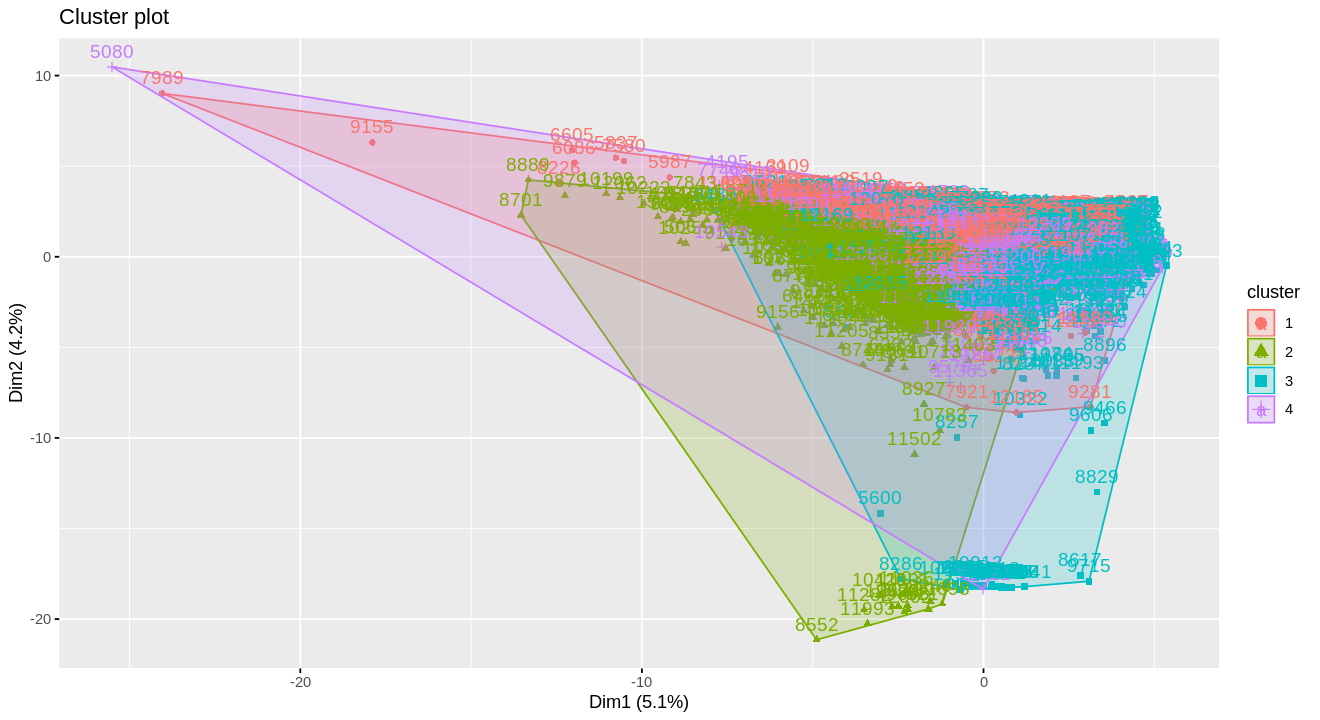

In [0]:
# Visualising the clusters of the whole dataset
options(repr.plot.width = 11, repr.plot.height = 6)
fviz_cluster(kmeans_res, df)

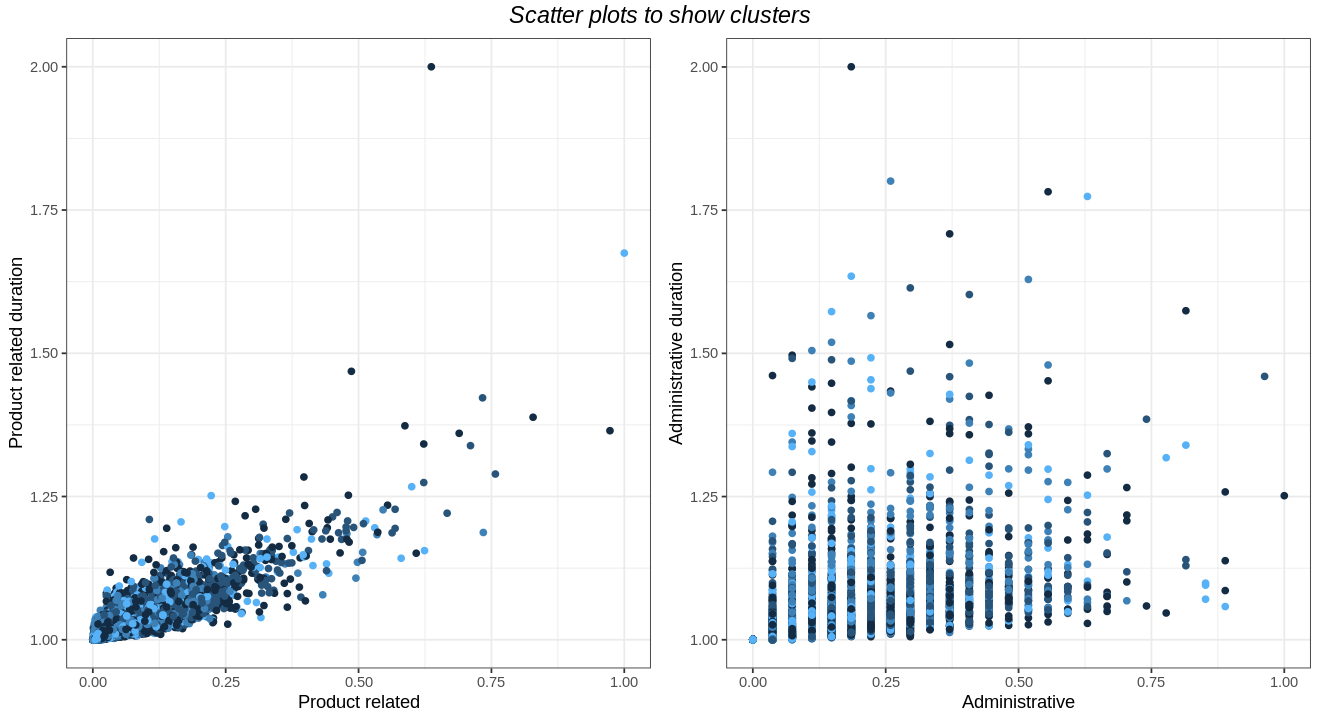

In [0]:
# Checking how some features have been clustered
options(repr.plot.width = 11, repr.plot.height = 6)

p1 = ggplot(df, aes(productrelated, productrelated_duration, col = kmeans_res$cluster)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x='Product related', y ='Product related duration')

p2 = ggplot(df, aes(administrative, administrative_duration, col = kmeans_res$cluster)) +
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Administrative', y = 'Administrative duration')

grid.arrange(p1, p2, ncol = 2, top = textGrob("Scatter plots to show clusters",gp=gpar(fontsize=14,font=3, color = 'darkmagenta')))

### Hierachical clustering

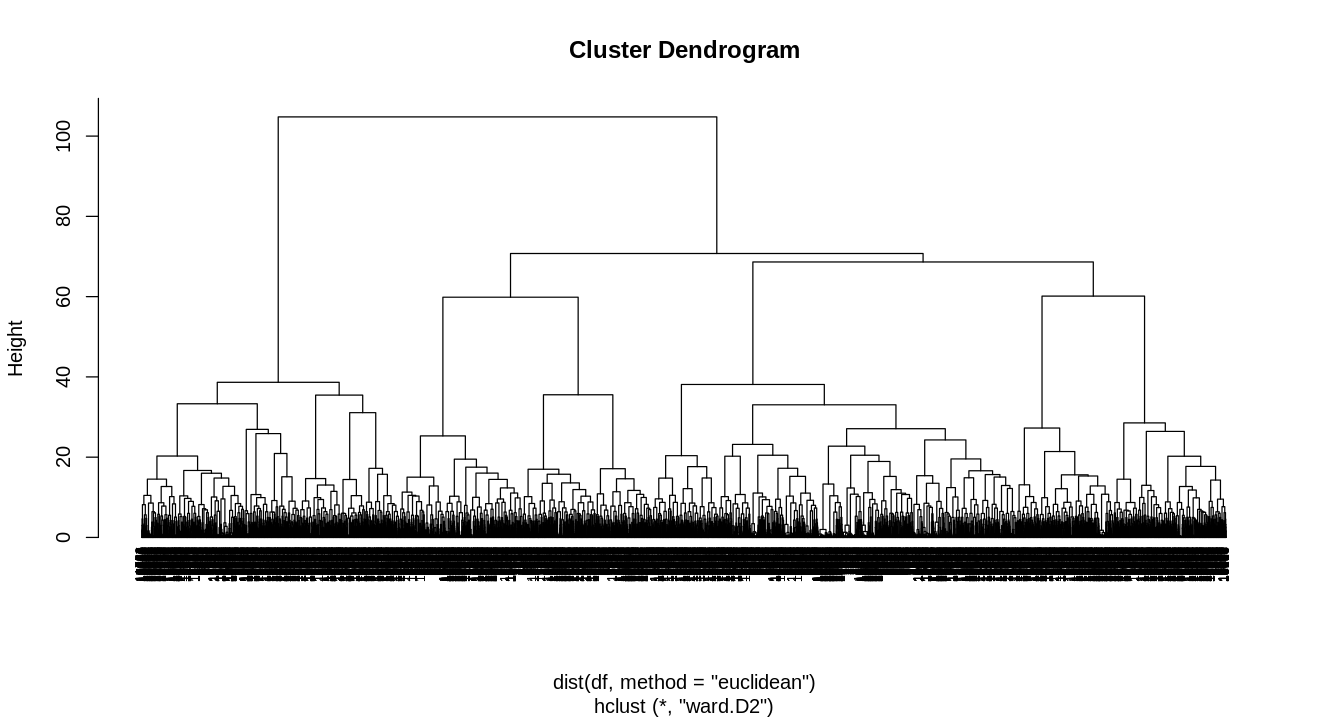

In [0]:
# The euclidean distance and the ward2 method has been used to perform hierachical clustering
hierachical_res = hclust(dist(df, method = 'euclidean'), method = 'ward.D2')

# Visualizing the hierachical dendogram
options(repr.plot.width = 11, repr.plot.height = 6)
plot(hierachical_res, cex = 0.6, hang = -1)

### Principal component analysis

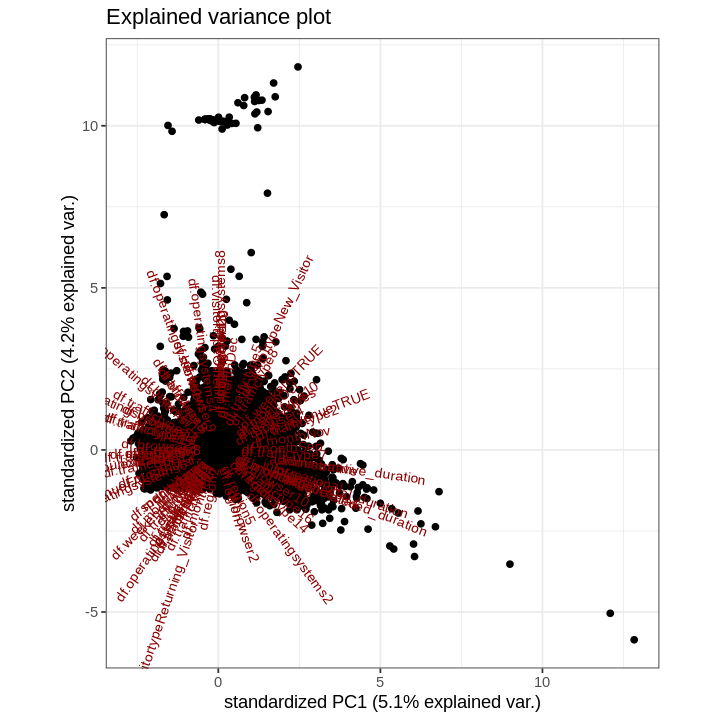

In [0]:
# Reducing the dimensionality of the dataset
pca_res = prcomp(main_df, scale = T, center = T)

# Visualising the pca results
options(repr.plot.width = 6, repr.plot.height = 6)
ggbiplot(pca_res) + 
  labs(title = 'Explained variance plot')

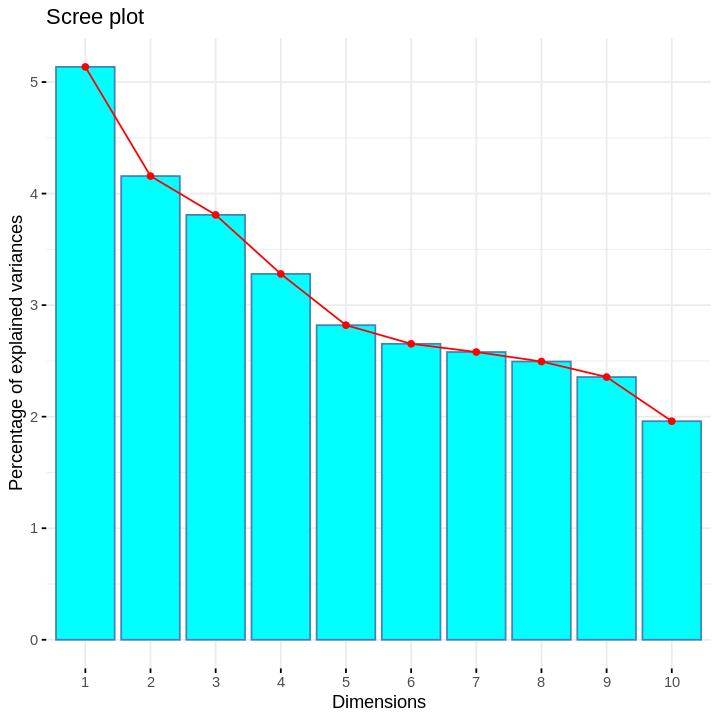

In [0]:
# Visualising eigenvalues (scree plot). Showing the percentage of variances explained by each principal component
fviz_eig(pca_res, barfill = 'cyan',linecolor = 'red' )

### t-Distributed Stochastic Neighbour Embedding

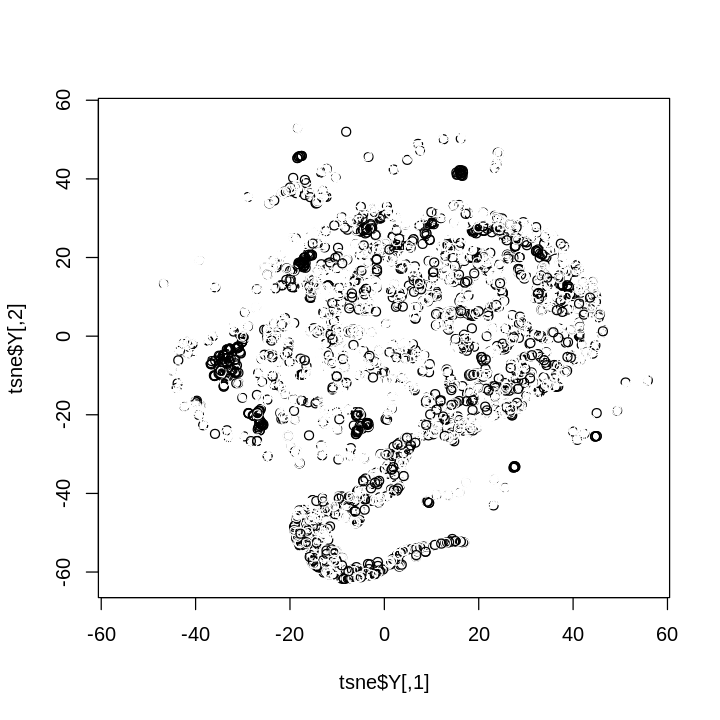

In [0]:
# t-SNE modelling
unique_df = unique(non_dummy_df[, 1:18])
tsne = Rtsne(unique_df[, 1:17], epoch=1000)
plot(tsne$Y, col= non_dummy_df$revenue)

### Conclusion
The clusters of kmeans are more defined when comparing them to the clusters hierachical clusters. Therefore, kmeans should be given preferance when clustering customer groups